# Машинное обучение в бизнесе

## Урок 1. Data-driven-подход на примере задачи маршрутизации заявок в helpdesk

## <center> Практическое задание </center>

Задание выполнил: Соковнин И.Л.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(type(df))
df.head(3)

<class 'pandas.core.frame.DataFrame'>


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [2]:
# print(df.shape)
# Размерность датасета

print('Строк в df:', df.shape[0], '\nСтолбцов в df:', df.shape[1])

Строк в df: 7043 
Столбцов в df: 21


## Анализ данных

##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
count = df['gender'].value_counts()
print(f'Gender:\n{count},\n\nСоотношение мужчин и женщин:\nMale/Female = {count[0]/count[1]:.5}')

Gender:
Male      3555
Female    3488
Name: gender, dtype: int64,

Соотношение мужчин и женщин:
Male/Female = 1.0192


##### 2. Какое количество уникальных значений у поля InternetService?

In [4]:
print(f'Количество уникальных значений поля InternetService:')
df['InternetService'].value_counts()

Количество уникальных значений поля InternetService:


Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Статистика (median, mean, std) может быть выведена, только по числовым полям. Это поля
# SeniorCitizen (int64)
# tenure (int64)
# и MonthlyCharges (float64)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
# 3. Выведите статистики по полю TotalCharges (median, mean, std).

df['TotalCharges'].describe().T

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

__Получили не то что хотели.__

Для получения нужных статистик необходимо преобразовать поле TotalCharges к типу float64

In [8]:
# Например следующим образом
df_TotalCharges = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [9]:
#  Выведите статистики по значениям полю TotalCharges (median, mean, std).

df_TotalCharges.describe().T

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [10]:
df['PhoneService'].head()

0     No
1    Yes
2    Yes
3     No
4    Yes
Name: PhoneService, dtype: object

### вариант 1

In [11]:
df = pd.concat([df, pd.get_dummies(df['PhoneService'], prefix='PhoneService', dtype='int8')], axis=1)
df[['PhoneService', 'PhoneService_No', 'PhoneService_Yes']].head()

,PhoneService,PhoneService_No,PhoneService_Yes
0,No,1,0
1,Yes,0,1
2,Yes,0,1
3,No,1,0
4,Yes,0,1


#### вариант 2

In [12]:
def features(df, colname):
    """4. Feature engineering
          Генерация новых фич"""
    
    # 1. PhoneService
    # cat_colname = 'PhoneService_int'
    cat_colname = colname + '_int'

    df[cat_colname] = df[colname]
    df.loc[df[cat_colname] == 'No', cat_colname] = 0
    df.loc[df[cat_colname] == 'Yes', cat_colname] = 1
    
    df[cat_colname] = df[cat_colname].astype(np.int8)

In [13]:
col = 'PhoneService'
features(df, col)
df[['PhoneService', 'PhoneService_int']].head()

,PhoneService,PhoneService_int
0,No,0
1,Yes,1
2,Yes,1
3,No,0
4,Yes,1


### вариант 3

In [14]:
def feature_int(df, colname):
    """Замена значений поля colname на числовые (Yes->1, No->0)"""

    df.loc[df[colname] == 'No', colname] = 0
    df.loc[df[colname] == 'Yes', colname] = 1
    
    df[colname] = df[colname].astype(np.int8)

In [15]:
feature_int(df, col)
df['PhoneService'].head(5)

0    0
1    1
2    1
3    0
4    1
Name: PhoneService, dtype: int8

In [16]:
# вариант 4

# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# df['PhoneService'] = labelencoder.fit_transform(df['PhoneService'])
# df['PhoneService'].head(5)

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

__Обработка пропусков__

In [17]:
# 5.1 Заменяем пустую строку и записи только c пробелами на np.nan
col='TotalCharges'

df[col] = df[col].replace(r'^\s*$', np.nan, regex=True)

In [18]:
# Преобразуем поле TotalCharges к типу float32

df[col] = pd.to_numeric(df[col],errors = 'coerce')
c_min = df[col].min()
c_max = df[col].max()
if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
    df[col] = df[col].astype(np.float32)
    
df[[col]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7032 non-null   float32
dtypes: float32(1)
memory usage: 27.6 KB


In [19]:
# 5.2 Заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. 
df[col] = df[col].fillna(0)

In [20]:
# 5.3 Снова выведите статистики и сравните с тем, что вы видели в вопросе 3
print(df[[col]].info())
print()

'''
Было:
count     7043
unique    6531
top       20.2
freq        11
Name: TotalCharges, dtype: object
'''

print(df[col].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TotalCharges  7043 non-null   float32
dtypes: float32(1)
memory usage: 27.6 KB
None

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64


После сделанных преобразований мы смогли получить статистику по полю __TotalCharges__:<br>
* mean (среднее значение), std (стандартное отклонение), min, max и квантили 25%, 50%, 75%

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)


In [21]:
# вариант 3
col = 'Churn'
feature_int(df, col)
df[col].head(5)


0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int8

In [22]:
print( df[[col]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Churn   7043 non-null   int8 
dtypes: int8(1)
memory usage: 7.0 KB
None


##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [23]:
def feature_nis(df, colname):
    """Замена значений поля colname на числовые (Yes->1, No->0, No internet service->0)"""

    df.loc[(df[colname] == 'No') | (df[colname] == 'No internet service'), colname] = 0
    df.loc[df[colname] == 'Yes', colname] = 1
    
    df[colname] = df[colname].astype(np.int8)

In [24]:
# Анализируем данные

print(df['StreamingMovies'].value_counts())
print()
print(df['StreamingTV'].value_counts())
print()
print(df['TechSupport'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


In [25]:
col='StreamingMovies'
feature_nis(df, col)
df[col].head
print(df[col].value_counts())

0    4311
1    2732
Name: StreamingMovies, dtype: int64


In [26]:
col='StreamingTV'
feature_nis(df, col)
df[col].head
print(df[col].value_counts())

0    4336
1    2707
Name: StreamingTV, dtype: int64


In [27]:
col='TechSupport'
feature_nis(df, col)
df[col].head
print(df[col].value_counts())

0    4999
1    2044
Name: TechSupport, dtype: int64


##### 8. Заполните пропуски в поле PhoneService значением 0

In [28]:
# Заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. 
col = 'PhoneService'
df[col] = df[col].fillna(0)
print(df[col].value_counts())

1    6361
0     682
Name: PhoneService, dtype: int64


#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [29]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']


# Оставить поля которые содержатся в списке columns
df_1 = df.loc[:, columns]
df_1.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


In [30]:
# Оставить поля которые не содержатся в списке columns
df_2=df.loc[:,~df.columns.isin(columns)]
df_2.head(3)

,customerID,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,PhoneService_No,PhoneService_Yes,PhoneService_int
0,7590-VHVEG,0,Yes,No,No phone service,DSL,No,Yes,No,Month-to-month,Yes,Electronic check,29.85,1,0,0
1,5575-GNVDE,0,No,No,No,DSL,Yes,No,Yes,One year,No,Mailed check,56.95,0,1,1
2,3668-QPYBK,0,No,No,No,DSL,Yes,Yes,No,Month-to-month,Yes,Mailed check,53.85,0,1,1


##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [31]:
from sklearn.model_selection import train_test_split

features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'

y = df[target]
df = df.loc[:, features]
df.head(3)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)

In [32]:
X_train.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport
1814,Male,12,1,258.350006,0,0,0
5946,Female,42,1,3160.550049,1,0,1
3881,Male,71,1,4681.750000,0,0,1


In [33]:
y_train.head(3)

1814    0
5946    1
3881    0
Name: Churn, dtype: int8

##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [35]:
# Обучим наш пайплайн
gender.fit(X_train, y_train)

Pipeline(steps=[('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))])

##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [36]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [37]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [38]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [39]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [40]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [41]:
#наши прогнозы для тестовой выборки
predicted = pipeline.predict_proba(X_test)[:, 1]
predicted[:10]

array([0.04, 0.72, 0.01, 0.17, 0.62, 0.11, 0.98, 0.  , 0.02, 0.36])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [42]:
from sklearn.metrics import roc_auc_score, log_loss

print("AUC&ROC", roc_auc_score(y_test, predicted))

AUC&ROC 0.7683707627807209


In [46]:
print("logloss", log_loss(y_test, predicted))

logloss 0.8769990728048892


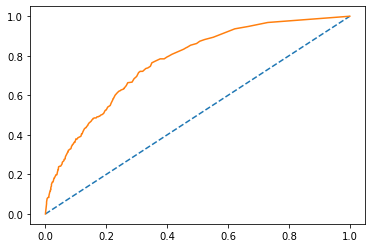

In [54]:
# roc curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# keep probabilities for the positive outcome only
probs = predicted
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr)
# show the plot
pyplot.show()

# https://www.machinelearningmastery.ru/how-to-score-probability-predictions-in-python/

In [55]:
# roc auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# keep probabilities for the positive outcome only
probs = predicted
# calculate roc auc
auc = roc_auc_score(y_test, probs)
print(auc)

# https://www.machinelearningmastery.ru/how-to-score-probability-predictions-in-python/

0.7683707627807209


### Сохраним наш пайплайн

In [44]:
pip install dill

Note: you may need to restart the kernel to use updated packages.


In [45]:
import dill
with open("model_RF.dill", "wb") as f:

    dill.dump(pipeline, f)